<a href="https://colab.research.google.com/github/anyaozm/Vaccination-Predictions/blob/master/Copy_of_Copy_of_vaccineation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
seed = 13

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [0]:
#File paths
path_sub = '/content/submission_format.csv'
path_test = '/content/test_set_features.csv'
path_train_x = '/content/training_set_features.csv'
path_train_y = '/content/training_set_labels.csv'

In [0]:
#DataFrames
df_trainx = pd.read_csv(path_train_x, index_col=0)
df_trainy = pd.read_csv(path_train_y, index_col=0)

In [683]:
#Display Data
df_trainy.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [684]:
df_trainx.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [685]:
df_trainx.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [686]:
#Looking at types, focusing on transforming object types
df_trainx.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [687]:
df_trainy.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [0]:
#merge df for exploring relationships we will use this Dataframe as one to manipulate and explore, this will not be the train df
#for that we will use df_trainx
df = pd.merge(df_trainx, df_trainy,left_index=True, right_index=True)

In [0]:
#Encode the labels into int
le = preprocessing.LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

In [0]:
df['race'] = le.fit_transform(df['race'])
df['census_msa'] = le.fit_transform(df['census_msa'])
df['hhs_geo_region'] = le.fit_transform(df['hhs_geo_region'])
df['sex'] = le.fit_transform(df['sex']) 

In [0]:
df['education'].fillna('< 12 Years', inplace=True)

In [0]:
df['education'] = le.fit_transform(df['education'])

In [693]:
df['income_poverty'].describe()

count                         22284
unique                            3
top       <= $75,000, Above Poverty
freq                          12777
Name: income_poverty, dtype: object

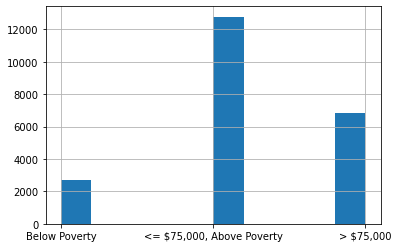

In [694]:
df['income_poverty'].hist()

In [0]:
dfi = df[['h1n1_concern','marital_status','seasonal_vaccine', 'household_children','household_adults']]

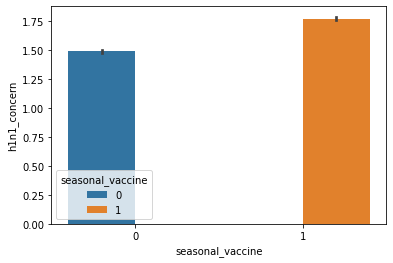

In [696]:
from numpy import mean, median

sns.barplot('seasonal_vaccine','h1n1_concern', hue="seasonal_vaccine", data=dfi, estimator=mean)

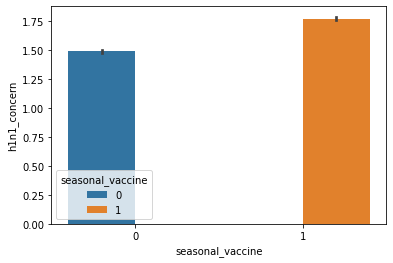

In [697]:
sns.barplot('seasonal_vaccine','h1n1_concern', hue="seasonal_vaccine", data=dfi, estimator=mean)

In [0]:
from scipy.stats import chi2_contingency

In [699]:
# Phi Coefficient is the same as Pearson for two binary variables
(df["h1n1_vaccine"]
     .corr(df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [700]:
#display crosstab
pd.crosstab(
    df["h1n1_vaccine"], 
    df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [0]:
#Prep to Display Data
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

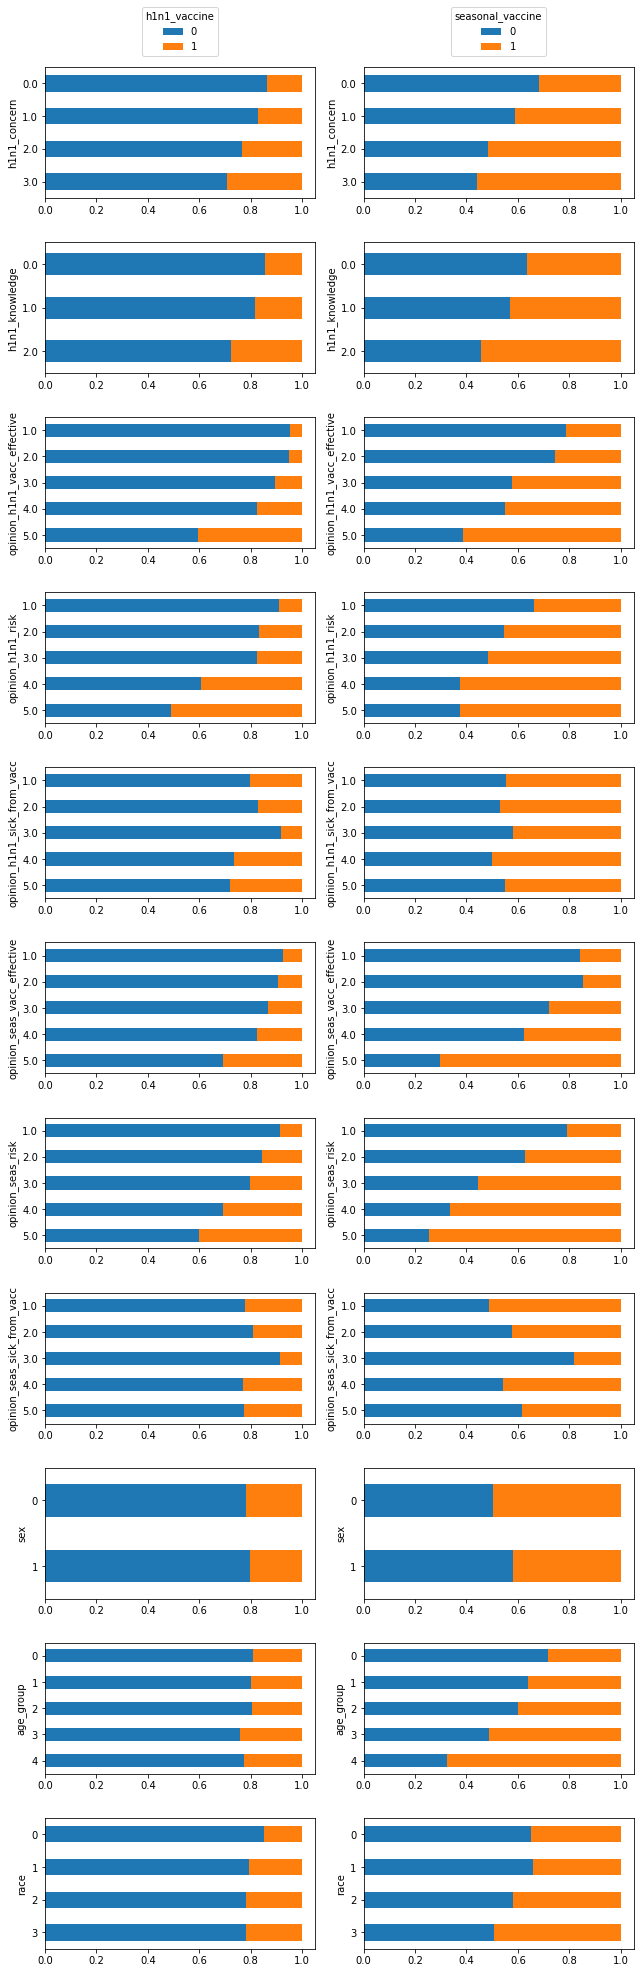

In [702]:
#Plotting out relationships
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

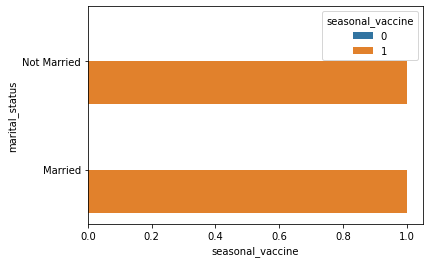

In [703]:
sns.barplot('seasonal_vaccine','marital_status', hue="seasonal_vaccine", data=df, estimator=mean)

In [704]:
df_trainx['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [705]:
df_trainx['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [706]:
print(df_trainx['rent_or_own'].unique())
print(df_trainx['employment_status'].unique())
print(df_trainx['employment_industry'].unique())
print(df_trainx['employment_occupation'].unique())

['Own' 'Rent' nan]
['Not in Labor Force' 'Employed' 'Unemployed' nan]
[nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans']
[nan 'xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' 'xqwwgdyp' 'ccgxvspp'
 'qxajmpny' 'kldqjyjy' 'mxkfnird' 'hfxkjkmi' 'bxpfxfdn' 'ukymxvdu'
 'cmhcxjea' 'haliazsg' 'dlvbwzss' 'xzmlyyjv' 'oijqvulv' 'rcertsgn'
 'tfqavkke' 'hodpvpew' 'uqqtjvyb' 'pvmttkik' 'dcjcmpih']


In [0]:
estimators = MultiOutputClassifier(
    estimator=LinearSVC()
)

In [0]:
#pipeline for sklearn (I found ANN works better so didn't display the use of this pipeline) feel free to use and expand 
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [709]:
df_trainx.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [0]:
#Clean Data
df['employment_occupation'].fillna('0', inplace=True)
df['employment_industry'].fillna('0', inplace=True)
df['employment_status'].fillna('0', inplace=True)
df['marital_status'].fillna('Not Married', inplace=True)
df['income_poverty'].fillna('<= $75,000, Above Poverty', inplace=True)
df['rent_or_own' ].fillna('<= $75,000, Above Poverty', inplace=True)
df['income_poverty'] = le.fit_transform(df['income_poverty'])
df['rent_or_own' ] = le.fit_transform(df['rent_or_own'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['employment_status'] = le.fit_transform(df['employment_status'])
df['employment_occupation'] = le.fit_transform(df['employment_occupation'])
df['employment_industry'] = le.fit_transform(df['employment_industry'])

In [711]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,1,2,8,2,0.0,0.0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,2,1,1,0,0.0,0.0,13,20,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,1,1,9,0,2.0,0.0,15,22,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,2,2,5,1,0.0,0.0,0,0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,2,3,3,0,0,0,1,1,9,0,1.0,0.0,19,6,0,0


In [712]:
#significance level is 0.05
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [713]:
# see correlations for h1n1_vaccine
def feature_corr():
  for i in df.columns.to_list():
      x = (df["h1n1_vaccine"]
     .corr(df[i], method="pearson"))
      
      if -0.05 < x < 0.05:
        y = True
      else: 
        y = False
      print(i, x, y)

  for i in df.columns.to_list():
      x = (df["h1n1_vaccine"]
     .corr(df[i], method="pearson"))
  
      if 0.05 < x:
        print("'"+str(i) +"'", end=', ')
        e = "'" + str(i) +"'" 

#significance level is 0.01
feature_corr()

h1n1_concern 0.12192918865076169 False
h1n1_knowledge 0.11795064339844803 False
behavioral_antiviral_meds 0.04060800327456801 True
behavioral_avoidance 0.047689905043082126 True
behavioral_face_mask 0.07049752145272599 False
behavioral_wash_hands 0.07471240680630027 False
behavioral_large_gatherings 0.017821781969168123 True
behavioral_outside_home 0.021768050278798093 True
behavioral_touch_face 0.07164778616525437 False
doctor_recc_h1n1 0.39389048123870074 False
doctor_recc_seasonal 0.20986356903654485 False
chronic_med_condition 0.09520719150123019 False
child_under_6_months 0.06696186123167966 False
health_worker 0.169768050195133 False
health_insurance 0.12116971023713823 False
opinion_h1n1_vacc_effective 0.2693470016729776 False
opinion_h1n1_risk 0.3232646603477815 False
opinion_h1n1_sick_from_vacc 0.07509070100682942 False
opinion_seas_vacc_effective 0.17927164805513024 False
opinion_seas_risk 0.25857102154277595 False
opinion_seas_sick_from_vacc 0.008359635564326935 True
age_gro

In [714]:
# see correlations for seasonal_vaccine
def feature_corr():
  for i in df.columns.to_list():
      x = (df["seasonal_vaccine"]
     .corr(df[i], method="pearson"))
      
      if -0.05 < x < 0.05:
        y = True
      else: 
        y = False
      print(i, x, y)

  for i in df.columns.to_list():
      x = (df["seasonal_vaccine"]
     .corr(df[i], method="pearson"))
  
      if 0.05 < x or -0.05 < x :
        print("'"+str(i) +"'", end=', ')
        d = "'" + str(i) +"'" 
       # return d

#significance level is 0.01
feature_corr()

h1n1_concern 0.15482752754531984 False
h1n1_knowledge 0.12015163337811167 False
behavioral_antiviral_meds 0.006276626094045238 True
behavioral_avoidance 0.07639544075162953 False
behavioral_face_mask 0.05008345189734373 False
behavioral_wash_hands 0.11241423506124404 False
behavioral_large_gatherings 0.06402527357079991 False
behavioral_outside_home 0.053508692996077974 False
behavioral_touch_face 0.12022754993467916 False
doctor_recc_h1n1 0.1986072377125634 False
doctor_recc_seasonal 0.369190095415938 False
chronic_med_condition 0.17017435933622668 False
child_under_6_months 0.012097071847513933 True
health_worker 0.12731099359179554 False
health_insurance 0.2008584684437994 False
opinion_h1n1_vacc_effective 0.20507238369748007 False
opinion_h1n1_risk 0.21662525069678779 False
opinion_h1n1_sick_from_vacc 0.027404153839459724 True
opinion_seas_vacc_effective 0.3618747273514616 False
opinion_seas_risk 0.39010571338475786 False
opinion_seas_sick_from_vacc -0.06151035614929928 False
age_g

In [715]:
len(e) 

16

In [0]:
#df_trainx.drop(columns = e, inplace=True)

In [717]:
numeric_cols = df_trainx.columns[df_trainx.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [0]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [0]:
#Tranform Training Data
X_pre = preprocessor.fit_transform(df_trainx)

In [0]:
#Tranform Label Data
y_pre = df_trainy
y_pre= np.array(y_pre)

In [0]:
#Train Test Split
X_pretr, X_prets, y_pretr, y_prets = train_test_split(
    X_pre,
    y_pre,
    test_size=0.33,
    shuffle=True,
    stratify=y_pre,
    random_state=seed
)

In [722]:
print(len(y_pretr))
print(len(X_pretr))
print(X_pretr.shape)
print(y_pretr.shape)

17893
17893
(17893, 23)
(17893, 2)


In [723]:
import scipy.stats as scs
from scipy.stats import chisquare
#Checking if the labels are correlated

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)


print(chi_square_of_df_cols(df, 'seasonal_vaccine', 'h1n1_concern'))

(661.7625859400396, 4.102289002153701e-143, 3, array([[1761.25162502, 4356.63971445, 5650.86041706, 2453.24824347],
       [1534.74837498, 3796.36028555, 4924.13958294, 2137.75175653]]))


In [724]:
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chisq_of_df_cols(df, 'seasonal_vaccine', 'h1n1_concern')

(661.7625859400396,
 4.102289002153701e-143,
 3,
 array([[1761.25162502, 1534.74837498],
        [4356.63971445, 3796.36028555],
        [5650.86041706, 4924.13958294],
        [2453.24824347, 2137.75175653]]))

In [0]:
epoch_size = len(X_pretr)/64

In [0]:
# create model
model = Sequential()
model.add(Dense(60, input_dim=23, activation='selu'))
model.add(Dense(3, activation='selu'))
model.add(Dense(2, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [0]:
# evaluate model with standardized dataset, did not use this in this commit
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [731]:
model.fit(X_pretr ,y_pretr, epochs=275, batch_size=64)

Epoch 1/275
17893/17893 [==============================] - 0s 25us/step - loss: 0.6653 - accuracy: 0.6013
Epoch 2/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.5335 - accuracy: 0.7519
Epoch 3/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.4829 - accuracy: 0.7793
Epoch 4/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.4637 - accuracy: 0.7879
Epoch 5/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.4556 - accuracy: 0.7914
Epoch 6/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.4521 - accuracy: 0.7933
Epoch 7/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.4503 - accuracy: 0.7948
Epoch 8/275
17893/17893 [==============================] - 0s 21us/step - loss: 0.4495 - accuracy: 0.7953
Epoch 9/275
17893/17893 [==============================] - 0s 20us/step - loss: 0.4490 - accuracy: 0.7961
Epoch 10/275
17893/17893 [====================

In [732]:
#Evaluate model
results = model.evaluate(X_prets, y_prets, batch_size=128)
print('test loss, test acc:', results)

8814/8814 [==============================] - 0s 8us/step
test loss, test acc: [0.44380253486441784, 0.7974245548248291]


In [733]:
#Predict the test data and look at ROC AUC 
pred_y = model.predict(X_prets)
print(roc_auc_score(y_prets,pred_y))

0.8317440824667588


In [0]:
df_sub = pd.read_csv(path_test, index_col=0)

In [735]:
df_sub

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [0]:
Xs = preprocessor.fit_transform(df_sub)

In [0]:
pred = model.predict(Xs)

In [0]:
sub = pd.read_csv(path_sub)
sub.drop(columns=['h1n1_vaccine','seasonal_vaccine'], inplace=True)

In [0]:
s = pd.DataFrame(pred)

In [0]:
s.rename(columns={0: 'h1n1_vaccine',1: 'seasonal_vaccine'}, inplace=True)

In [741]:
result = pd.concat([sub, s], axis=1, sort=False)
result

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.074865,0.415475
1,26708,0.035790,0.039014
2,26709,0.610583,0.779647
3,26710,0.718654,0.849266
4,26711,0.749869,0.822588
...,...,...,...
26703,53410,0.379648,0.566159
26704,53411,0.077770,0.326736
26705,53412,0.137192,0.349018
26706,53413,0.101657,0.291062


In [0]:
result.to_csv('/content/sub.csv')

In [0]:
#Exploring other machine learning model accuracies
#X_pretr, X_prets, y_pretr, y_prets  
#clf = MultiOutputClassifier(SVC()).fit(X_pretr, y_pretr)
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X_pretr, y_pretr)

In [744]:
clf.score(X_prets, y_prets)

0.5924665305196278

In [745]:
y_eval = clf.predict(X_prets)
roc_auc_score(y_eval, y_prets)

0.7062892749926308